#  EDA for prices of train tickets for Spanish Railways


This project's main purpose is to improve my Seaborn visualisation skills and experiment with the XGBoost library.

The dataset for this project was obtained from Kaggle, it has been deleted since then.
## Data preparation

In [1]:
#Libraries necessary for the data analysis and visualisations.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import norm
from scipy import stats

#Statistical library for regression model 
import statsmodels as sm

# Pretty display for notebooks
%matplotlib inline

#Load in the data. Load all the time-series data in datetime format
df = pd.read_csv('C:\\Users\\Jan\\Desktop\\Python\\renfe.csv', parse_dates=['insert_date', 'start_date', 'end_date'])

#Check if loading the data worked and what the datasets dimensions are
print('Train tickets dataset has {} data points with {} variables each.'.format(*df.shape))

Train tickets dataset has 2579771 data points with 10 variables each.


## Data cleaning

Since price is the target variable, I will drop all the rows missing that value.

In [2]:
#Check if all the columns have correct data type and how much memory does the dataset use.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579771 entries, 0 to 2579770
Data columns (total 10 columns):
Unnamed: 0     int64
insert_date    datetime64[ns]
origin         object
destination    object
start_date     datetime64[ns]
end_date       datetime64[ns]
train_type     object
price          float64
train_class    object
fare           object
dtypes: datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 196.8+ MB


In [3]:
#Get total percentages of missing data in the columns.
df.isnull().mean()*100

Unnamed: 0      0.000000
insert_date     0.000000
origin          0.000000
destination     0.000000
start_date      0.000000
end_date        0.000000
train_type      0.000000
price          12.042968
train_class     0.374607
fare            0.374607
dtype: float64

In [4]:
#Drop all of the missing values.
df.dropna(inplace=True)

In [5]:
#Drop the useless column(second index).
df = df.drop('Unnamed: 0', 1)

In [6]:
#Sort values using 'insert_date' as an index
df.sort_values(by=['insert_date'])

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
1598916,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 14:00:00,2019-04-18 16:30:00,AVE,100.40,Turista,Promo
1598923,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 19:30:00,2019-04-18 22:40:00,AVE,85.10,Turista,Promo
1598922,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 19:00:00,2019-04-18 21:30:00,AVE,115.65,Preferente,Promo
1598921,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 18:30:00,2019-04-18 21:20:00,AVE,90.50,Turista Plus,Promo
1598920,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 17:30:00,2019-04-18 20:40:00,AVE,75.40,Turista,Promo
1598919,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 16:30:00,2019-04-18 19:15:00,AVE,102.15,Turista Plus,Promo
1598917,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 14:30:00,2019-04-18 17:21:00,AVE,107.70,Turista,Flexible
1598915,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 13:25:00,2019-04-18 16:24:00,AVE-TGV,107.70,Turista,Flexible
1598924,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 20:30:00,2019-04-18 23:40:00,AVE,85.10,Turista,Promo
1598914,2019-04-11 21:49:46,MADRID,BARCELONA,2019-04-18 12:30:00,2019-04-18 15:30:00,AVE,107.70,Turista,Flexible


In [7]:
#Almost half of the journeys end in Madrid.
df['destination'].value_counts()/df.shape[0]*100

MADRID        48.165785
BARCELONA     19.320565
VALENCIA      15.783288
SEVILLA       13.931708
PONFERRADA     2.798655
Name: destination, dtype: float64

In [8]:
#All the journeys that don't end in Madrid originate from Madrid.
df[df['destination'] != 'MADRID']['origin'].value_counts()

MADRID    1176165
Name: origin, dtype: int64

Which means that all journeys go through Madrid. So we can make a column with all the cities except for Madrid, to make the regression model.

In [9]:
# Function to seperate Madrid from origin and destination.
def journey_parser(row):
    if row['origin'] == 'BARCELONA':
        return 'Barcelona'
    if row['destination'] == 'BARCELONA':
        return 'Barcelona'
    if row['origin'] == 'VALENCIA':
        return 'Valencia'
    if row['destination'] == 'VALENCIA':
        return 'Valencia'
    if row['origin'] == 'SEVILLA':
        return 'Sevilla'
    if row['destination'] == 'SEVILLA':
        return 'Sevilla'
    if row['origin'] == 'PONFERRADA':
        return 'Ponferrada'
    if row['destination'] == 'PONFERRADA':
        return 'Ponferrada'

# Apply the function.
df = df.assign(location=df.apply(journey_parser, axis=1))

# Check if there are any missing values
print('Length of the new column is {} and length of the dataset is {}'.format(len(df['location']), df.shape[0]))

Length of the new column is 2269090 and length of the dataset is 2269090


## Data Exploration

In this section I will investigate the dataset, trying to find out if any of the variables are correlated to the ticket prices.

Since ticket price is our **target variable** (we are trying to predict it), I named it Y. Rest of the features are **predictors**, so I named them X. 



### Descriptive statistics for the ticket prices

Start with calculating some descriptive statistics.

In [10]:
# Could have been done with one line of code (describe), but wouldn't have been printed as neatly.
minimum_price = np.min(df['price'])
maximum_price = np.max(df['price'])
mean_price = np.mean(df['price'])
median_price = np.median(df['price'])
std_price = np.std(df['price'])

# Show the calculated statistics
print('Price statistics for Spanish Railways tickets dataset: \n')
print('Minimum ticket price: €{:,.2f}'.format(minimum_price))
print('Maximum ticket price: €{:,.2f}'.format(maximum_price))
print('Mean price of the tickets: €{:,.2f}'.format(mean_price))
print('Median price of the tickets €{:,.2f}'.format(median_price))
print('Standard deviation of ticket prices: €{:,.2f}'.format(std_price))

Price statistics for Spanish Railways tickets dataset: 

Minimum ticket price: €15.45
Maximum ticket price: €214.20
Mean price of the tickets: €63.39
Median price of the tickets €60.30
Standard deviation of ticket prices: €25.78


Some visualisations to get an idea about the dataset!

Barcelona     36.782543
Valencia      29.705212
Sevilla       27.573344
Ponferrada     5.938901
Name: location, dtype: float64

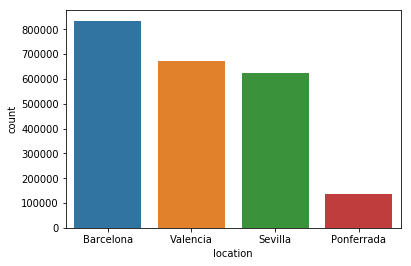

In [11]:
# Get a count and distributions for the location column.
sns.countplot(x = 'location',
              data = df,
              order = df['location'].value_counts().index)
df['location'].value_counts()*100/df['location'].value_counts().sum()

AVE          73.444112
REGIONAL      6.250171
INTERCITY     3.829288
ALVIA         3.482057
AV City       2.795041
MD-LD         1.929937
AVE-TGV       1.442384
R. EXPRES     1.367376
AVE-MD        1.127721
AVE-LD        1.094888
LD            1.086867
LD-MD         0.877004
TRENHOTEL     0.786835
MD-AVE        0.290821
MD            0.195497
Name: train_type, dtype: float64

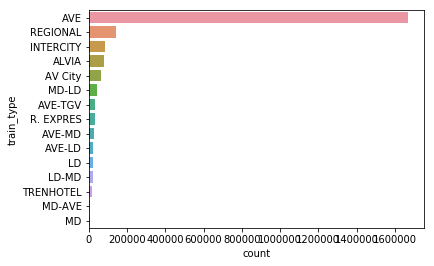

In [12]:
# Get a count and distributions for the train_type column.
sns.countplot(y = 'train_type',
              data = df,
              order = df['train_type'].value_counts().index)
df['train_type'].value_counts()*100/df['train_type'].value_counts().sum()

In [13]:
# Change the Spanish names to English for the ticket classes.
df['train_class'] = df['train_class'].map({'Cama G. Clase':'1st class overnight', 'Cama Turista':'2nd class overnight', 'Preferente':'1st class', 'Turista':'2nd class', 'Turista con enlace':'2nd class with a change', 'Turista Plus':'better 2nd class'})
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,location
0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,2nd class,Promo,Sevilla
1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,2nd class,Promo,Sevilla
2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,2nd class,Promo,Sevilla
3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,1st class,Promo,Sevilla
5,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,60.30,2nd class,Promo,Sevilla


2nd class                  75.945247
1st class                   9.380501
better 2nd class            8.019779
2nd class with a change     6.602735
2nd class overnight         0.043938
1st class overnight         0.007800
Name: train_class, dtype: float64

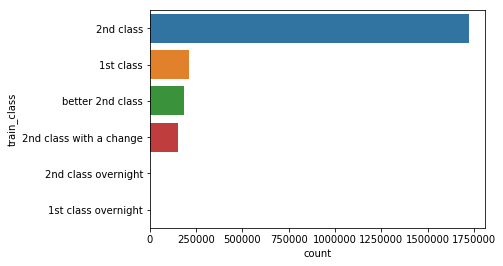

In [14]:
# Get a count and distributions for the train_class column.
sns.countplot(y = 'train_class',
              data = df,
              order = df['train_class'].value_counts().index)
df['train_class'].value_counts()*100/df['train_class'].value_counts().sum()

Promo                  68.919875
Flexible               20.451679
Adulto ida              7.617547
Promo +                 2.999440
Individual-Flexible     0.007800
Mesa                    0.003393
Grupos Ida              0.000264
Name: fare, dtype: float64

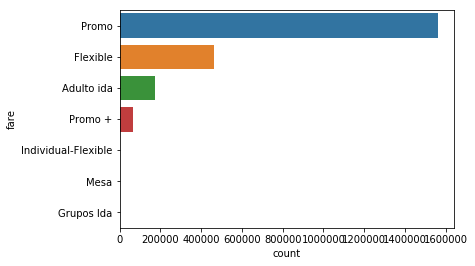

In [15]:
# Get a count and distributions for the fare column.
sns.countplot(y = 'fare',
              data = df,
              order = df['fare'].value_counts().index)
df['fare'].value_counts()*100/df['fare'].value_counts().sum()

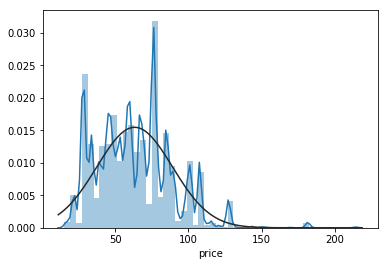

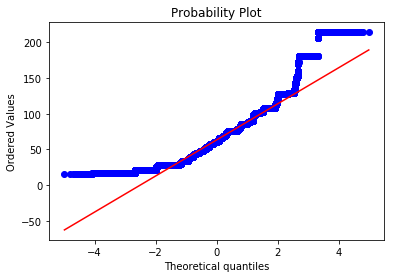

In [16]:
# Histogram and normal probability plot distribution for the prices of the tickets.
sns.distplot(df['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['price'], plot=plt)

## Feature engineering

Generating new features to make a better regression model!

In [17]:
# Feature engineer new parameters
df['day_of_week'] = df['start_date'].dt.day_name()
df['time_from_ticket_search_in_days'] = (df['start_date'] - df['insert_date']).dt.total_seconds() / 86400 
df['journey_length_in_hours'] = (df['end_date'] - df['start_date']).dt.total_seconds()/3600
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare,location,day_of_week,time_from_ticket_search_in_days,journey_length_in_hours
0,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 06:20:00,2019-05-29 09:16:00,AV City,38.55,2nd class,Promo,Sevilla,Wednesday,40.033530,2.933333
1,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:00:00,2019-05-29 09:32:00,AVE,53.40,2nd class,Promo,Sevilla,Wednesday,40.061308,2.533333
2,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 07:30:00,2019-05-29 09:51:00,AVE,47.30,2nd class,Promo,Sevilla,Wednesday,40.082141,2.350000
3,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 08:00:00,2019-05-29 10:32:00,AVE,69.40,1st class,Promo,Sevilla,Wednesday,40.102975,2.533333
5,2019-04-19 05:31:43,MADRID,SEVILLA,2019-05-29 09:00:00,2019-05-29 11:38:00,AVE,60.30,2nd class,Promo,Sevilla,Wednesday,40.144641,2.633333


In [18]:
# Remove any values that had been incorrectly labeled (time_from_ticket_search_in_days below 0).
df = df.loc[df['time_from_ticket_search_in_days'] > 0, :]

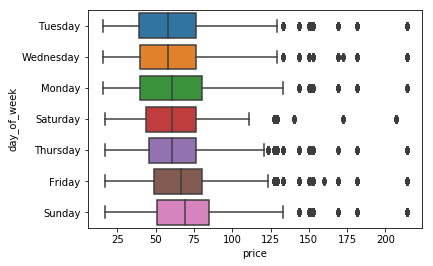

In [19]:
# Compare prices between days of the week and order the boxplots by increasing median values.
my_order = df.groupby(by=['day_of_week'])['price'].median().sort_values(ascending=True).index
sns.boxplot(y='day_of_week', x='price', data=df, order=my_order)

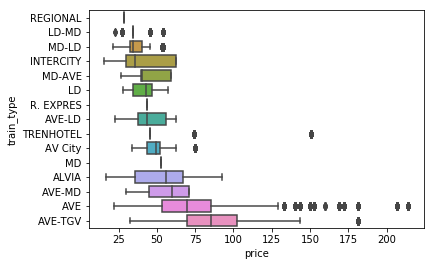

In [20]:
# Look at the price distributions of train companies. Sorted by median value.
my_order = df.groupby(by=['train_type'])['price'].median().sort_values(ascending=True).index
sns.boxplot(y='train_type', x='price', data=df, order=my_order)

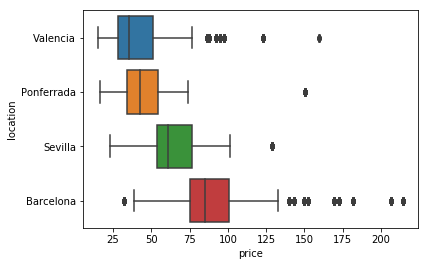

In [21]:
# Look at the price distributions of fares. Sorted by median value.
my_order = df.groupby(by=['location'])['price'].median().sort_values(ascending=True).index
sns.boxplot(y='location', x='price', data=df, order=my_order)

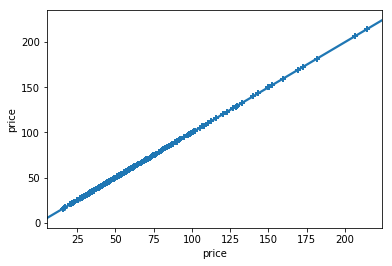

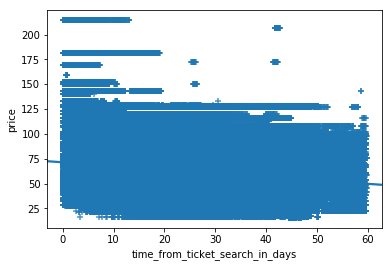

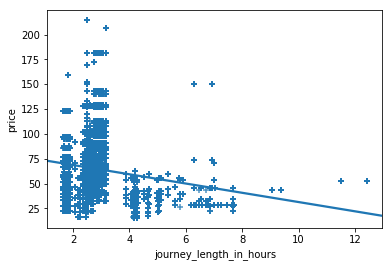

In [22]:
# Checking if there is correlation between price and other numerical columns.
for val in df.select_dtypes(np.number).columns:
    sns.regplot(df[val], df['price'], marker='+')
    plt.show()

It seems there is no correlation between duration of the journey and price. There is a slight correlation between a time of purchase of the tickets and prices.

## Preparing the data for regression

* Make y and X with target variable and features respectively.
* Split the dataset into training and test dataset.
* Encode all categorical features into numerical values.
* Run XGboost with early stopping rounds, to ensure it stops when the evaluation on test set starts dropping.
* Evaluate the test set

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

y = df['price']
X = df[['day_of_week', 'time_from_ticket_search_in_days', 'journey_length_in_hours', 'location', 'train_type', 'train_class', 'fare']].copy()

lb_make = LabelEncoder()
for val in X.select_dtypes(object).columns:
    X[val] = lb_make.fit_transform(X[val])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [24]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=8)
my_model.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

C:\Users\Jan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[14:19:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=8, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

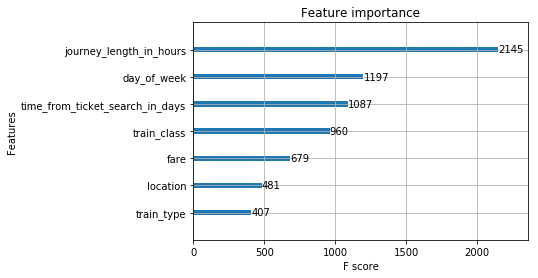

In [25]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(my_model)
pyplot.show()

In [26]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predictions = my_model.predict(X_test)

r2_validation = r2_score(y_test, predictions)
percent_value = str(r2_validation*100) + '%'

print('Test the model on the validation set: \n')
print('Mean Absolute Error : ' + str(mean_absolute_error(y_test, predictions)))
print('R-squared of ' + str(r2_validation))

Test the model on the validation set: 

Mean Absolute Error : 5.499596103504778
R-squared of 0.8974530480613421


R-squared score of 0.8974 means that we can explain 89.74% of the variance in the data which is a pretty high score!

## Future plans:
 * Explore SHAP library to visualise the gradient boosting model better
 
Go back to my [portfolio](https://github.com/JanAdamiak/data_science_portfolio)